In [18]:
import sys
sys.path.append(r"c:\Users\04ama\OneDrive\survival_analysis")

from src.data_gen.scenario1_random import simulate_scenario1
from lifelines import KaplanMeierFitter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df, true_params = simulate_scenario1()

In [7]:
df.head()

,age,salary,tenure,gender,risk_score,true_event_time,censor_time,time,event,scenario
0,62.725910,31785.965147,18.820382,0,-0.271175,5.904624,9.356070,5.904624,1,random_censoring
1,62.454814,39539.832703,15.723642,0,-1.500033,2.399932,12.986006,2.399932,1,random_censoring
2,67.375265,49788.696062,19.580686,1,0.536072,1.618989,1.228046,1.228046,0,random_censoring
3,66.958142,28626.268056,24.732722,0,0.698698,2.986369,17.763420,2.986369,1,random_censoring
4,55.000000,34249.245000,10.191531,0,-1.002321,2.674088,6.871128,2.674088,1,random_censoring


In [ ]:
true_params

{'beta': [0.03, -0.02, 0.05],
 'weibull_shape': 1.5,
 'weibull_scale': 20.0,
 'censoring_rate': 0.3,
 'censoring_type': 'random'}

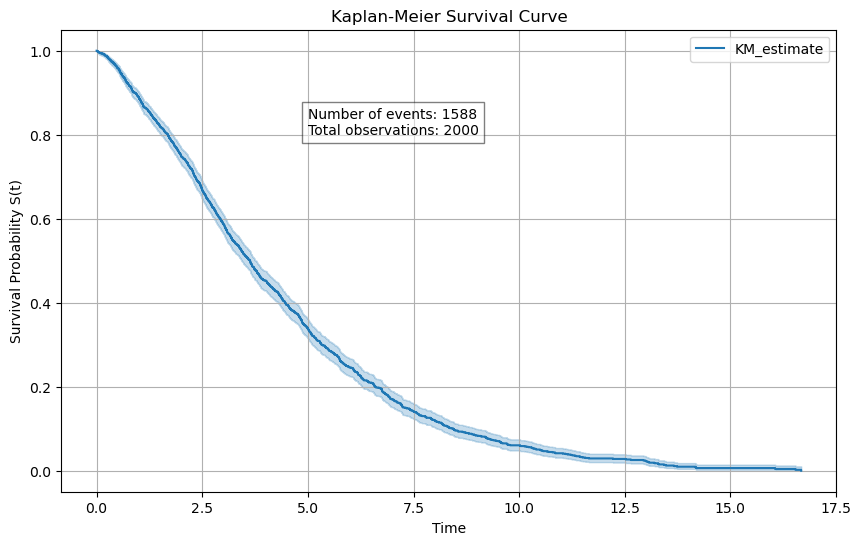

In [16]:
def kap_meier_curve(df):
    """Calculate the survival function S(t) at time t given parameters."""

    km = KaplanMeierFitter()
    km.fit(durations=df['time'], event_observed=df['event'])
    plt.figure(figsize=(10, 6))
    km.plot_survival_function()
    plt.title("Kaplan-Meier Survival Curve")
    plt.xlabel("Time")
    plt.ylabel("Survival Probability S(t)")
    plt.text(5, 0.8, f"Number of events: {df['event'].sum()}\nTotal observations: {len(df)}", fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
    plt.grid()

kap_meier_curve(df)


In [22]:



def plot_correlation_matrix(df):
    """Plot the correlation matrix of the DataFrame."""
    plt.figure(figsize=(12, 10))
    
    sns.pairplot(df, vars=["age","salary","tenure","risk_score","censor_time"])
    plt.title("Correlation Matrix")
    plt.show()
def plot_censoring_distribution(df):
    """Plot the distribution of censoring times."""
    plt.figure(figsize=(10, 6))
    sns.histplot(df['censor_time'], bins=30, kde=True)
    plt.title("Censoring Time Distribution")
    plt.xlabel("Censoring Time")
    plt.ylabel("Frequency")
    plt.text(5,80, f"Censoring rate:{true_params['censoring_rate']:.2f}, Censoring type:{true_params['censoring_type']}", fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
    plt.grid()
    plt.show()

def true_weibell(df):
    import numpy as np 
    from scipy.stats import weibull_min # standard weibull distribution
    shape = true_params["weibull_shape"]
    scale = true_params["weibull_scale"]
    t = np.linspace(0, df.time.max(), 200)
    S_true = weibull_min.sf(t, c=shape, scale=scale)
    plt.plot(t, S_true, label="True survival", linewidth=2)
        



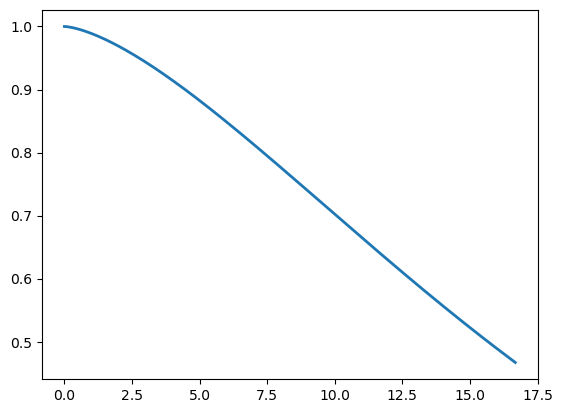

<Figure size 1200x1000 with 0 Axes>

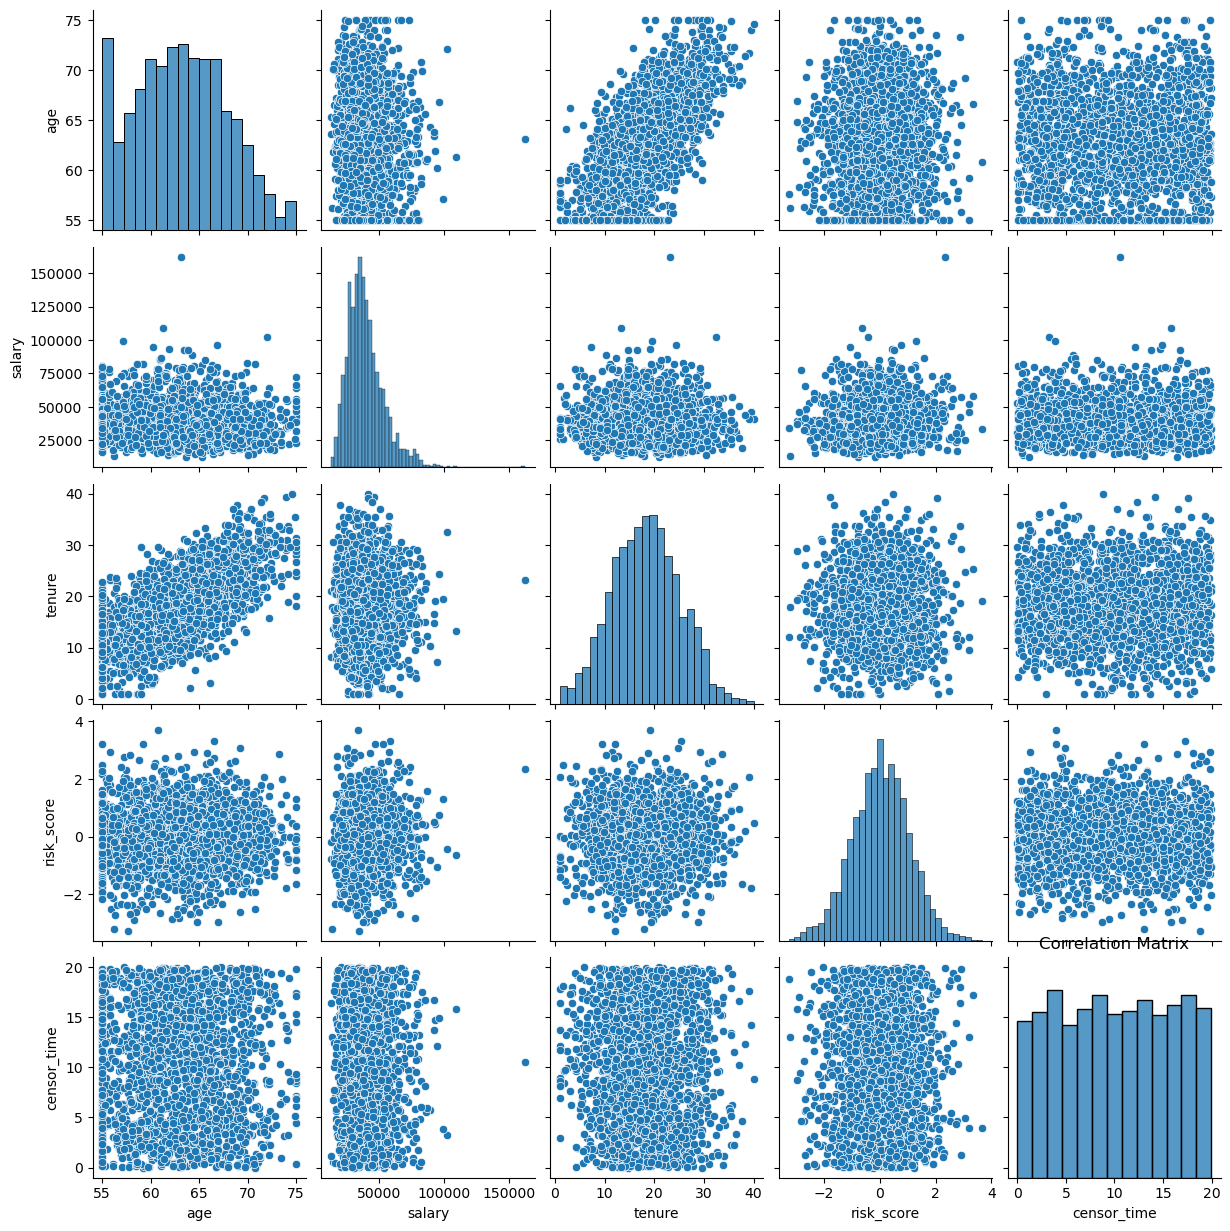

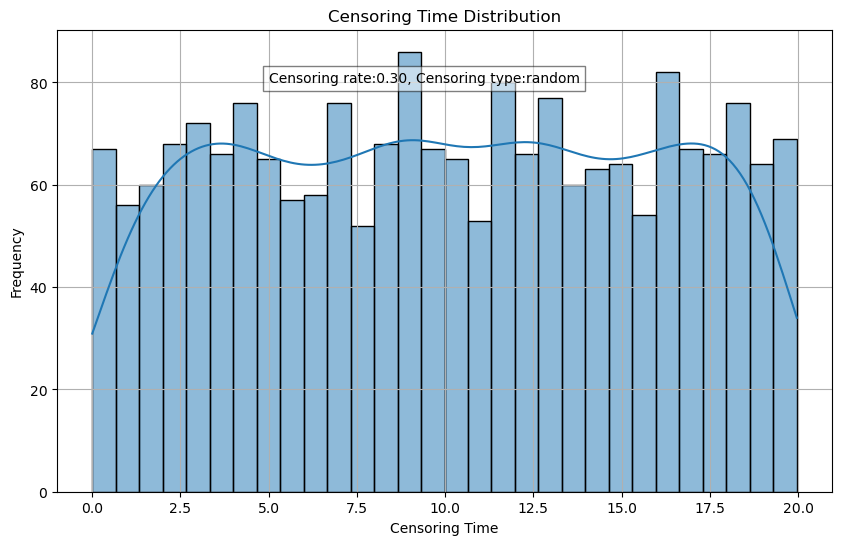

In [23]:
true_weibell(df)
plot_correlation_matrix(df)
plot_censoring_distribution(df)